# **Part A experiments:**
1.	**Experiment variables**: (a) Input: Title, (b) Model: Baseline ML,
**Insights:** Very low accuracy (34%),
**Next action:** Try a state-of-the-art model

2.	Experiment variables: (a) Input: Title, (b) Model: Transformers,
Insights: Better accuracy (52%), but still low,
Next action: Experiment with the Input variable

3.	Experiment variables: (a) Input: Title+content, (b) Model: Various ML,
Insights: Random Forest performs the best (70%),
Next action: Re-try a state-of-the-art model with new Input

4.	Experiment variables: (a) Input: Title+content, (b) Model: Transformers,
Insights: Almost the same accuracy (70%), so it is not about the modeling,
Next action: Experiment further with Input

5.	Experiment variables: (a) Input: Title+content+url, (b) Model: Random Forest,
Insights: High accuracy (87%),
Next action: Try only url

6.	Experiment variables: **(a) Input: url, (b) Model: Random Fores**t
Insights: Very high accuracy (92.5%),
Next action: Re-try a state-of-the-art model for comparison,

7.	Experiment variables: (a) Input: url, (b) Model: Transformer,
Insights: Excellent accuracy (95%), but requires exceptionally high resources and time to train

# Load data and Preprocessing

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive

/content/drive


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/train_data.csv'
df = pd.read_csv(file_path)
print(df.head())

                                                 url  \
0  https://www.platform.gr/life-2/fashion/75668-d...   
1  https://www.protothema.gr/greece/article/96354...   
2  https://www.vimaorthodoxias.gr/ekklisia-tis-el...   
3  http://physics4u.gr/blog/2018/07/13/%ce%bf-%cf...   
4  https://www.tilestwra.com/pos-akougete-o-ichos...   

                                               title  \
0  Δες εδώ τις ολοκαίνουργιες μάσκες προστασίας α...   
1  Φλώρινα: Έκρυβε χασίς, χάπια και άγνωστη ουσία...   
2  Άνω κάτω στην Εκκλησία της Ελλάδος για το συλλ...   
3                Ο σπειροειδής ραβδωτός Γαλαξίας μας   
4  Πώς ακούγεται ο ήχος έναρξης των Windows XP 80...   

                                             content                  label  
0  Οι συνεισφορές θα διατεθούν στο Κοινοτικό Ταμε...          Style&Fashion  
1  Δείτε βίντεο Η στιγμή της ισχυρότατης έκρηξης ...       Sensitive Topics  
2  Η απάντηση ήρθε λίγη ώρα αργότερα από τον Μητρ...  Religion&Spirituality  
3  Ο Γαλαξίας 

In [ ]:
df.describe()

,url,title,content,label
count,2498,2498,2498,2498
unique,2498,2498,2338,21
top,https://www.platform.gr/life-2/fashion/75668-d...,Δες εδώ τις ολοκαίνουργιες μάσκες προστασίας α...,Δείτε βίντεο Η στιγμή της ισχυρότατης έκρηξης ...,Culture
freq,1,1,81,360


In [ ]:
print(df['label'])
print(df.shape)
print(df['label'].shape)

0               Style&Fashion
1            Sensitive Topics
2       Religion&Spirituality
3                     Science
4              Viral Articles
                ...          
2493                 Politics
2494         Sensitive Topics
2495                  Culture
2496                   Beauty
2497                   Sports
Name: label, Length: 2498, dtype: object
(2498, 4)
(2498,)


In [ ]:
print(df['title'][150])
print(df['label'][150])
print(df['url'][150])

DxOMark: εξαιρετική η απόδοση του Smartphone for Snapdragon Insiders
Tech&Computing


In [ ]:
# Mapping
label_mapping = {
    'Style&Fashion': 0,
    'Sensitive Topics': 1,
    'Religion&Spirituality': 2,
    'Science': 3,
    'Viral Articles': 4,
    'Beauty': 5,
    'Tech&Computing': 6,
    'Healthy Living': 7,
    'Sports': 8,
    'Culture': 9,
    'Business&Finance': 10,
    'Education': 11,
    'Astrology': 12,
    'Family&Relationships': 13,
    'Politics': 14,
    'Food&Drink': 15,
    'Pop Culture': 16,
    'Automotive': 17,
    'Attractions': 18,
    'Home&Garden': 19,
    'Travel': 20
}
df['label'] = df['label'].map(label_mapping)

df

,url,title,content,label
0,https://www.platform.gr/life-2/fashion/75668-d...,Δες εδώ τις ολοκαίνουργιες μάσκες προστασίας α...,Οι συνεισφορές θα διατεθούν στο Κοινοτικό Ταμε...,0
1,https://www.protothema.gr/greece/article/96354...,"Φλώρινα: Έκρυβε χασίς, χάπια και άγνωστη ουσία...",Δείτε βίντεο Η στιγμή της ισχυρότατης έκρηξης ...,1
2,https://www.vimaorthodoxias.gr/ekklisia-tis-el...,Άνω κάτω στην Εκκλησία της Ελλάδος για το συλλ...,Η απάντηση ήρθε λίγη ώρα αργότερα από τον Μητρ...,2
3,http://physics4u.gr/blog/2018/07/13/%ce%bf-%cf...,Ο σπειροειδής ραβδωτός Γαλαξίας μας,Ο Γαλαξίας μας αποτελείται κυρίως από ένα πυρή...,3
4,https://www.tilestwra.com/pos-akougete-o-ichos...,Πώς ακούγεται ο ήχος έναρξης των Windows XP 80...,Πολλοί άνθρωποι αναγνωρίζουν αμέσως τον ήχο έν...,4
...,...,...,...,...
2493,https://www.newsbomb.gr/politikh/story/531341/...,Παναγιώταρος: Φονιάς ο Φλωράκης - Ήρωας ο Ντερ...,Μετά τις καταγγελίες του Ηλία Κασιδιάρη στη Βο...,14
2494,https://www.iefimerida.gr/news/272145/mazis-pi...,Mάζης: Πιθανός στόχος του ISIS και η Ελλάδα,Δείτε βίντεο Η στιγμή της ισχυρότατης έκρηξης ...,1
2495,https://e-tetradio.gr/Article/29210/online-kai...,Online και δωρεάν οι «Παρόντες» του Γιώργου Αυ...,Είναι η νέα ταινία ντοκιμαντέρ του Γιώργου Αυ...,9
2496,https://www.tlife.gr/omorfia/mallia/ntoretta-p...,Η Ντορέττα Παπαδημητρίου με κουμπωτές αφέλειες...,Το red carpet είναι μια πολύ καλή αφορμή για ν...,5


# Machine Learning Modeling

### ML baseline model using title

The tile feature seems to be the richest in information...

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score


X = df['title']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

print(f"Model Type: MultinomialNB")
print(f"Accuracy: {acc}")

Model Type: MultinomialNB
Accuracy: 0.346


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Various ML models using title+content



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


df['text'] = df['title'] + df['content']

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.684
SVM Accuracy: 0.666
Random Forest Accuracy: 0.684
Multinomial Naive Bayes Accuracy: 0.538
Gradient Boosting Accuracy: 0.688
KNN Accuracy: 0.644
Decision Tree Accuracy: 0.518
XGBoost Accuracy: 0.702


Random Forest and XGBoost seem to be the most promising

In [ ]:
# Train 5 times the models for stability

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_accuracy_scores = []

for i in range(5):
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42 + i)
    xgb_model.fit(X_train_tfidf, y_train)
    xgb_predictions = xgb_model.predict(X_test_tfidf)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)

    xgb_accuracy_scores.append(xgb_accuracy)

xgb_accuracy_scores

[0.702, 0.702, 0.702, 0.702, 0.702]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_accuracy_scores = []

for i in range(5):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42 + i)
    rf_model.fit(X_train_tfidf, y_train)
    rf_predictions = rf_model.predict(X_test_tfidf)
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    rf_accuracy_scores.append(rf_accuracy)

rf_accuracy_scores

[0.684, 0.71, 0.704, 0.686, 0.68]

The Random Forest is a fast and accurate ML model.
So it is my final selection from all ML models.

### Random Forest using title, content, url

In [ ]:
# Combine the title, content, url
df['text'] = df['title'] + df['content'] + df['url']

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_accuracy_scores = []

for i in range(5):

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42 + i)
    rf_model.fit(X_train_tfidf, y_train)
    rf_predictions = rf_model.predict(X_test_tfidf)
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    rf_accuracy_scores.append(rf_accuracy)

rf_accuracy_scores

[0.872, 0.87, 0.878, 0.876, 0.862]

Url is a feature with rich information

In [ ]:
# Combine the url+title or url+content
df['text'] = df['title'] + df['url']

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_accuracy_scores = []

for i in range(5):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42 + i)
    rf_model.fit(X_train_tfidf, y_train)
    rf_predictions = rf_model.predict(X_test_tfidf)
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    rf_accuracy_scores.append(rf_accuracy)

rf_accuracy_scores

[0.926, 0.926, 0.926, 0.916, 0.924]

In [ ]:
df['text'] = df['content'] + df['url']

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_accuracy_scores = []

for i in range(5):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42 + i)
    rf_model.fit(X_train_tfidf, y_train)
    rf_predictions = rf_model.predict(X_test_tfidf)
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    rf_accuracy_scores.append(rf_accuracy)

rf_accuracy_scores

[0.87, 0.87, 0.864, 0.874, 0.864]

In [ ]:
# Random Forest only using url
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df['text'] = df['url']

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_accuracy_scores = []

for i in range(5):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42 + i)
    rf_model.fit(X_train_tfidf, y_train)
    rf_predictions = rf_model.predict(X_test_tfidf)
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    rf_accuracy_scores.append(rf_accuracy)

rf_accuracy_scores

[0.922, 0.926, 0.922, 0.924, 0.926]

Random forest with input feature only the URL is the best performant.

### Random Forest optimization and detailed metrics

In [ ]:
# faster optimization than Grid Search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    'n_estimators': sp_randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

random_search.fit(X_train_tfidf, y_train)

optimized_rf_model = random_search.best_estimator_

rf_predictions = optimized_rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best model accuracy: {rf_accuracy}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 174}
Best model accuracy: 0.902


Decide to keep the initial rf model

In [ ]:
rf_model

RandomForestClassifier(random_state=42)

Detailed metrics report for the selected model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

print("Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {accuracy:.4f}")

f1 = f1_score(y_test, rf_predictions, average='weighted')
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y_test, rf_predictions, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, rf_predictions, average='weighted')
print(f"Recall: {recall:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.85      0.93      0.89        57
           2       1.00      1.00      1.00        10
           3       1.00      0.96      0.98        27
           4       0.88      0.88      0.88         8
           5       1.00      0.86      0.93        22
           6       0.93      0.93      0.93        30
           7       0.85      0.81      0.83        36
           8       0.97      0.99      0.98        69
           9       0.91      0.98      0.95        64
          10       0.96      0.96      0.96        55
          11       1.00      1.00      1.00         7
          12       1.00      0.91      0.95        11
          13       0.79      0.65      0.71        17
          14       1.00      0.87      0.93        15
          15       1.00      1.00      1.00         6
          16       0.82      1.00      0.90         9
    

### Random forest model on unseen-test data

In [ ]:
file_path = '/content/drive/My Drive/unseen_test_data.csv'
df_test = pd.read_csv(file_path)
df_test

,url,title,content,label
0,http://www.runningnews.gr/item.php?id=18191,Επιμνημόσυνος Δρομικός Αποχαιρετισμός,Με σεβασμό και διακριτικότητα συγκεντρώθηκαν π...,Sports
1,https://www.vimaorthodoxias.gr/patriarxeia/ta-...,Τα Άγια Θεοφάνεια στα Τίρανα (Φωτογραφίες),Η εορτινή ατμόσφαιρα των Θεοφανίων και του Αγι...,Religion&Spirituality
2,https://www.newsitamea.gr/2015/04/03/prodosia-...,Προδοσία: 4 ουσιαστικά βήματα για να την ξεπερ...,"Όλοι έχουμε προδοθεί. Λίγο ή πολύ, δεν έχει τό...",Healthy Living
3,https://www.kathimerini.gr/1047549/article/ayt...,Η VOLVO CARS: ΑΚΟΜΗ ΕΝΑ ΒΗΜΑ ΣΤΗΝ ΗΛΕΚΤΡΟΚΙΝΗΣΗ,Δείτε βίντεο Η στιγμή της ισχυρότατης έκρηξης ...,Automotive
4,http://spirossoulis.com/spiti-diakosmisi-kadra...,Κάδρα: Εκμεταλλευτείτε τα Σωστά και Δημιουργήσ...,Ο τρόπος που διακοσμούμε τα σπίτια μας θα πρέπ...,Home&Garden
...,...,...,...,...
708,https://www.maxmag.gr/taxidia/kotor/,Κότορ: διακοπές στο μαργαριτάρι του Μαυροβουνίου,Ήρθε το καλοκαίρι και μαζί με αυτό ήρθε και η ...,Travel
709,https://www.biscotto.gr/birdie-num-num/,Birdie Num Num,Ένα φρέσκο cocktail bar έκανε την εμφάνισή του...,Attractions
710,https://jenny.gr/home-sweet-home/296182/xylina...,Ξύλινα χριστουγεννιάτικα δέντρα,Μία εναλλακτική λύση για όσους βαρέθηκαν το κλ...,Home&Garden
711,https://www.newsauto.gr/presentations/apokalip...,Αποκάλυψη για το πολυτελές SUV της Infiniti,Δείτε βίντεο Η στιγμή της ισχυρότατης έκρηξης ...,Automotive


In [ ]:
df_test['text'] = df_test['url']

# Mapping
label_mapping = {
    'Style&Fashion': 0,
    'Sensitive Topics': 1,
    'Religion&Spirituality': 2,
    'Science': 3,
    'Viral Articles': 4,
    'Beauty': 5,
    'Tech&Computing': 6,
    'Healthy Living': 7,
    'Sports': 8,
    'Culture': 9,
    'Business&Finance': 10,
    'Education': 11,
    'Astrology': 12,
    'Family&Relationships': 13,
    'Politics': 14,
    'Food&Drink': 15,
    'Pop Culture': 16,
    'Automotive': 17,
    'Attractions': 18,
    'Home&Garden': 19,
    'Travel': 20
}
df_test['label'] = df_test['label'].map(label_mapping)

In [ ]:
X_test_new = tfidf_vectorizer.transform(df_test['text'])

# Make predictions with the best performing Random Forest model
predictions_new = rf_model.predict(X_test_new)

from sklearn.metrics import classification_report, accuracy_score

accuracy_new = accuracy_score(df_test['label'], predictions_new)

report_new = classification_report(df_test['label'], predictions_new)

print(f"Accuracy on unseen dataset: {accuracy_new}")
print("Classification report on unseen dataset:")
print(report_new)

Accuracy on unseen dataset: 0.8190743338008415
Classification report on unseen dataset:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.35      0.89      0.50        27
           2       1.00      1.00      1.00        31
           3       0.86      0.67      0.75        27
           4       0.97      0.68      0.80        56
           5       0.85      0.85      0.85        27
           6       0.82      0.85      0.84        27
           7       0.65      0.74      0.69        27
           8       0.82      1.00      0.90        27
           9       0.47      0.96      0.63        27
          10       0.96      0.96      0.96        27
          11       1.00      1.00      1.00        27
          12       1.00      0.89      0.94        36
          13       0.86      0.67      0.75        27
          14       1.00      0.90      0.95        40
          15       0.94      0.75      0.83    

### Save the model and vectorizer to deploy in flask

In [ ]:
rf_model
tfidf_vectorizer

TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

In [ ]:
import joblib

joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

#### Flask app

In [ ]:
from flask import Flask, request, jsonify
import joblib


app = Flask(__name__)


model = joblib.load("rf_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

label_dict = {
    0: 'Style&Fashion',
    1: 'Sensitive Topics',
    2: 'Religion&Spirituality',
    3: 'Science',
    4: 'Viral Articles',
    5: 'Beauty',
    6: 'Tech&Computing',
    7: 'Healthy Living',
    8: 'Sports',
    9: 'Culture',
    10: 'Business&Finance',
    11: 'Education',
    12: 'Astrology',
    13: 'Family&Relationships',
    14: 'Politics',
    15: 'Food&Drink',
    16: 'Pop Culture',
    17: 'Automotive',
    18: 'Attractions',
    19: 'Home&Garden',
    20: 'Travel'
}

@app.route('/predict/rf', methods=['POST'])
def predict():
    data = request.get_json()

    if not data or 'url' not in data:
        return jsonify({'error': 'Missing url in request'}), 400

    try:
        vectorized_text = vectorizer.transform([data['url']])
        prediction = model.predict(vectorized_text)

        predicted_label_name = label_dict.get(prediction[0])
        return jsonify({'prediction': predicted_label_name})
    except Exception as e:
        return jsonify({'error': str(e)}), 500


if __name__ == '__main__':
    app.run(debug=False, port=9999)

### Subtask 1: Examine the sensitive topics (FN to zero)

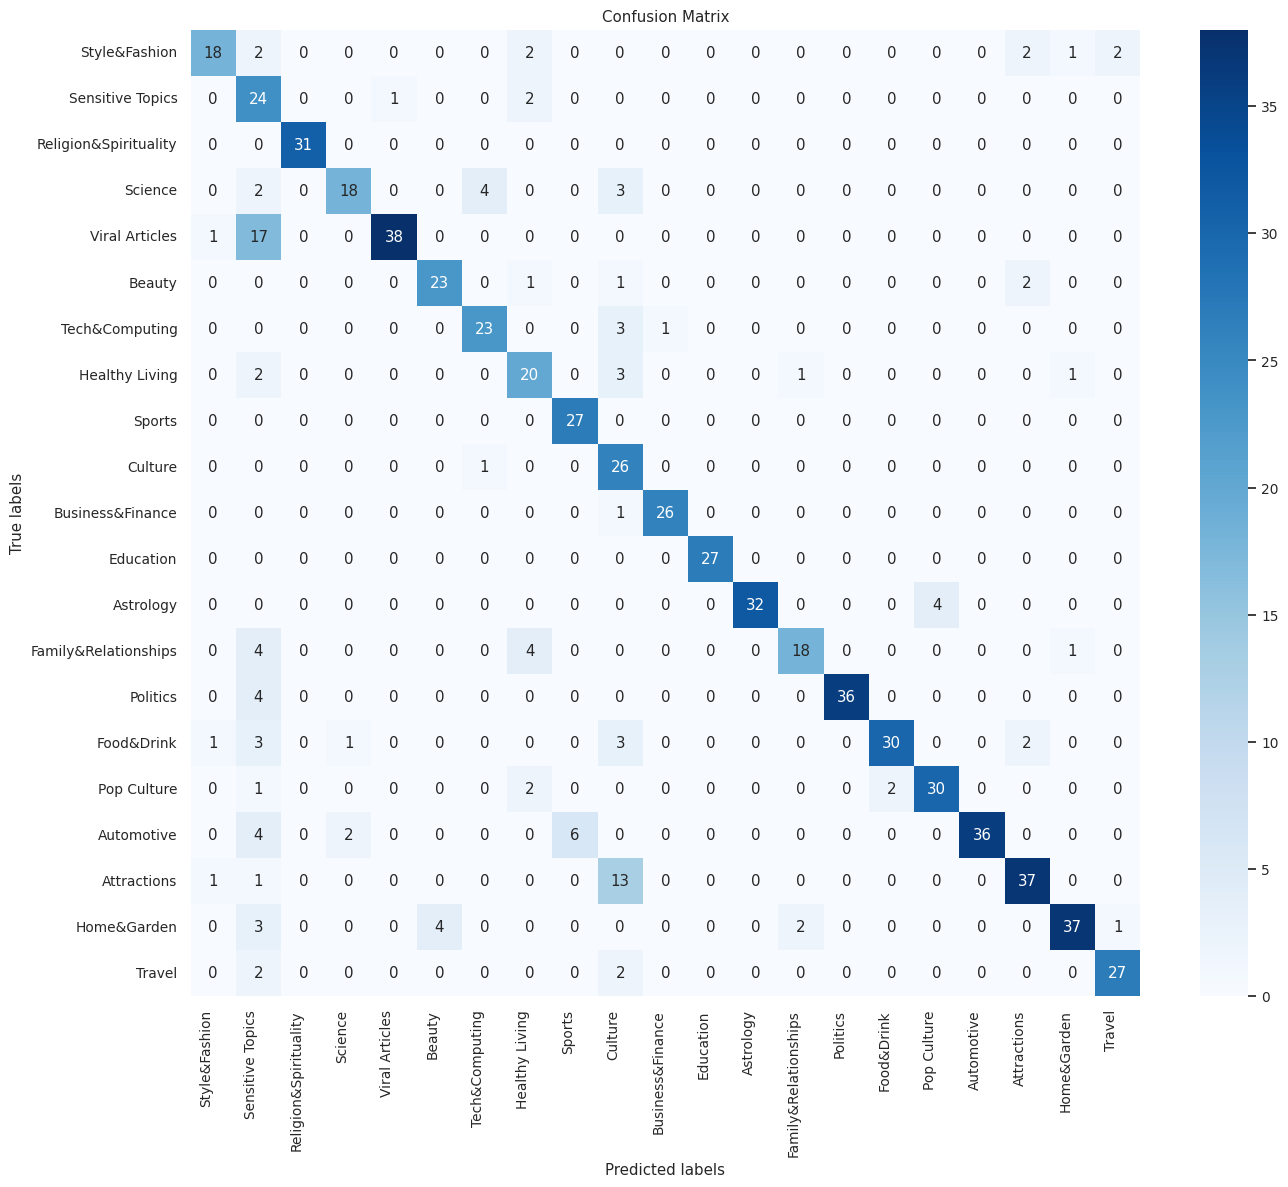

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

label_names = [
    'Style&Fashion', 'Sensitive Topics', 'Religion&Spirituality', 'Science', 'Viral Articles',
    'Beauty', 'Tech&Computing', 'Healthy Living', 'Sports', 'Culture',
    'Business&Finance', 'Education', 'Astrology', 'Family&Relationships', 'Politics',
    'Food&Drink', 'Pop Culture', 'Automotive', 'Attractions', 'Home&Garden', 'Travel'
]

cm = confusion_matrix(df_test['label'], predictions_new)

plt.figure(figsize=(14, 12))
sns.set(font_scale=0.9)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_names, yticklabels=label_names, cbar=True)

plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

In [ ]:
# Label encoding for 'Sensitive Topics' is 1
sensitive_topic_index = 1

# Sum all the values in the 'Sensitive Topics' row except for the true positive at cm[1, 1]
FN_sensitive = sum(cm[sensitive_topic_index, :]) - cm[sensitive_topic_index, sensitive_topic_index]

FN_sensitive

3

In [ ]:
TP_sensitive = cm[sensitive_topic_index, sensitive_topic_index]

FP_sensitive = sum(cm[:, sensitive_topic_index]) - TP_sensitive

FP_sensitive

45

Possible solutions to make False Negatives of sensitive topic to be sero:
1. Adjust Class Weights: Assign a higher class weight to "Sensitive Topics" during model training.

2. Threshold Tuning: Adjust the decision threshold for the "Sensitive Topics" class after you receive the probabilities from the model. Lowering the threshold means that you are willing to accept more false positives for reducing false negatives.

3. Resampling Techniques: Use resampling techniques such as oversampling the "Sensitive Topics" class or undersampling the other classes.

4. Custom Loss Function: Design a loss function that heavily penalizes misclassifying sensitive topics as non-sensitive.

Lets try solution 2.

In [ ]:
import numpy as np

probabilities = rf_model.predict_proba(X_test_new)

sensitive_probabilities = probabilities[:, 1]

# Define a new threshold that aims to minimize false negatives for 'Sensitive Topics'
# You can adjust this threshold based on your requirements
new_threshold = 0.14

# Apply threshold to determine new predictions
new_predictions = np.where(sensitive_probabilities >= new_threshold, 1, predictions_new)

# Calculate how many 'Sensitive Topics' predictions are now different
num_changed_predictions = np.sum((predictions_new != new_predictions) & (new_predictions == 1))

print(f"Number of articles now predicted as 'Sensitive Topics' instead of non-sensitive: {num_changed_predictions}")

Number of articles now predicted as 'Sensitive Topics' instead of non-sensitive: 79


In [ ]:
from sklearn.metrics import classification_report

# Compute a classification report which includes the recall for each class
report = classification_report(df_test['label'], new_predictions, target_names=label_names, output_dict=True)

# The recall for 'Sensitive Topics'
sensitive_recall = report['Sensitive Topics']['recall']
print(classification_report(df_test['label'], new_predictions, target_names=label_names))

weighted_recall = report['weighted avg']['recall']

print(f"Recall for 'Sensitive Topics': {sensitive_recall}")
print(f"Weighted average recall: {weighted_recall}")

# False negatives for 'Sensitive Topics' would be in the 'support' of the class minus the 'true positive'
# 'support' is the number of actual occurrences of the class in the specified dataset
sensitive_support = report['Sensitive Topics']['support']
true_positives_sensitive = sensitive_support * sensitive_recall
false_negatives_sensitive = sensitive_support - true_positives_sensitive

print(f"False Negatives for 'Sensitive Topics': {false_negatives_sensitive}")

                       precision    recall  f1-score   support

        Style&Fashion       0.84      0.59      0.70        27
     Sensitive Topics       0.18      1.00      0.31        27
Religion&Spirituality       1.00      1.00      1.00        31
              Science       1.00      0.59      0.74        27
       Viral Articles       1.00      0.57      0.73        56
               Beauty       0.85      0.85      0.85        27
       Tech&Computing       0.82      0.85      0.84        27
       Healthy Living       0.75      0.56      0.64        27
               Sports       0.80      0.89      0.84        27
              Culture       0.49      0.89      0.63        27
     Business&Finance       0.96      0.85      0.90        27
            Education       1.00      1.00      1.00        27
            Astrology       1.00      0.89      0.94        36
 Family&Relationships       0.94      0.56      0.70        27
             Politics       1.00      0.60      0.75  

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy with the new predictions
new_accuracy = accuracy_score(df_test['label'], new_predictions)

print(f"New accuracy after adjusting the threshold: {new_accuracy}")

New accuracy after adjusting the threshold: 0.7363253856942497


### Subtask 2: Further labeling (Clustering)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

data = df

# Filter dataset for a specific category
# Tried all categories, most promising based on silhouette score: sensitive topics, culture
# selected_category = 'sensitive topics'
selected_category = 'Culture'
filtered_data = data[data['label'] == selected_category]

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_data['content'])
# tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_data['url'])

tfidf_norm = normalize(tfidf_matrix)

n_clusters_options = range(2, 11)
silhouette_scores = []

for n_clusters in n_clusters_options:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_norm)
    silhouette_avg = silhouette_score(tfidf_norm, cluster_labels)
    silhouette_scores.append(silhouette_avg)

silhouette_scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.3536323037438268,
 0.2699933756232643,
 0.22651396323607004,
 0.22114328523111848,
 0.2223969452483416,
 0.23048753630687105,
 0.2113055300804917,
 0.2232408923864419,
 0.226967094037534]

In [ ]:
# Choosed the optimal number of clusters based on silhouette score
optimal_clusters = 2
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels_optimal = kmeans_optimal.fit_predict(tfidf_norm)

# Map the cluster labels back to the dataset
filtered_data['cluster'] = cluster_labels_optimal

# Function to get top terms per cluster
def get_top_terms_per_cluster(n_terms, cluster_labels, tfidf_matrix, feature_names):
    top_terms = {}
    for cluster_num in range(optimal_clusters):
        indices = np.where(cluster_labels == cluster_num)[0]
        cluster_sum = np.sum(tfidf_matrix[indices], axis=0)
        top_terms[cluster_num] = [feature_names[i] for i in cluster_sum.argsort()[::-1][:n_terms]]
    return top_terms

# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get top terms for each cluster
top_terms_per_cluster = get_top_terms_per_cluster(10, cluster_labels_optimal, tfidf_norm, feature_names)

print(top_terms_per_cluster)

{0: [array([['δειτε', 'λινκ', '2024', 'περισσοτερα', 'whatsapp', 'παρακατω',
        'google', 'ήθελα', 'yellowstone', 'jedi', 'κυριακη', 'παρασκευη',
        'σαββατο', 'σκηνοθεσια', 'edition', 'δθπ', 'καραμπάχ',
        'αρμένιοι', 'facebook', 'books', 'πω', 'διαδικασία', 'discogs',
        'verlag', 'καθένας', 'πάρα', 'wars', 'αττικής', 'εμένα',
        'γεμάτη', 'θέλω', 'artist', 'είχα', 'δημοσιεύθηκε', 'πιστεύω',
        'σύμπαν', 'παρθενώνα', 'σύλλογος', 'προσωπικά', 'κάνω', 'στόμα',
        'αφήγηση', 'τίποτα', 'τριλογίας', 'inside', 'έχεις', 'πράγμα',
        'καταφέρνει', 'καμία', 'κείμενα', 'κω', 'πλοκή', 'collection',
        'είμαστε', 'απλώς', 'ουσιαστικά', 'εντελώς', 'παναγιωτάτος',
        'αζερμπαϊτζάν', 'επανάσταση', 'connery', 'τύχη', 'αρμενία',
        'αρκετές', 'ομάδες', 'μήπως', 'μόνος', 'καθηγητής', 'ηθοποιών',
        'red', 'μπορώ', 'ας', 'ουίτμαν', 'καταστροφή', 'δεις', 'γέλιο',
        'john', 'έστω', 'sport', 'hd', 'ροκ', 'σιγά', 'μερικά', 'στόχος',
        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-44-cb1d505ac00d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = cluster_labels_optimal


In [ ]:
# Manual Interpretation and Label Suggestion
new_labels = {
    0: "Cultural and Artistic Expressions",
    1: "General Interest and Lifestyle"
}

# Fine-Tuning Transformers HuggingFace (3 tests for text classification)

#### 1. model: distilbert-base-multilingual-cased, input: title,
####yielded accuracy: 52%
#### 2. model: distilbert-base-multilingual-cased, input: title+content,
####yielded accuracy: 70%
#### 3. model: distilbert-base-multilingual-cased, input: url,
####yielded accuracy: 95.4%

................................................................................................................................................................

Selected Distillbert because combines accuracy and speed for text classification.

Initially tested distilbert-base-uncased, but the performance was bad (15%).
This was as expected since the model is not trained on greek context.

So the the selected Transformer model is distilbert-base-multilingual-cased.


In [ ]:
! pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict, load_metric
import pandas as pd
from sklearn.model_selection import train_test_split


# Assuming 'data' is your DataFrame and is already loaded
# df['text'] = df['title']
# df['text'] = df['title'] + df['content']
df['text'] = df['url']
data = df[['text', 'label']]

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Convert DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

datasets = DatasetDict({'train': train_dataset, 'test': test_dataset})

In [ ]:
print(datasets)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1998
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 500
    })
})


In [ ]:
datasets['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 1998
})

In [ ]:
datasets['train'][0]

{'text': 'https://www.tanea.gr/2020/11/13/politics/syriza-kata-mitsotaki-na-parei-piso-ton-ptoxeytiko/',
 'label': 14}

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-multilingual-cased")
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
def preprocess_function(examples):
    # return tokenizer(examples["text"], truncation=True)
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=512)

In [ ]:
tokenized_datasets = datasets.map(preprocess_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/1998 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1998
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 500
    })
})

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
label_list = data['label'].unique().tolist()
label2id = {
    'Style&Fashion': 0,
    'Sensitive Topics': 1,
    'Religion&Spirituality': 2,
    'Science': 3,
    'Viral Articles': 4,
    'Beauty': 5,
    'Tech&Computing': 6,
    'Healthy Living': 7,
    'Sports': 8,
    'Culture': 9,
    'Business&Finance': 10,
    'Education': 11,
    'Astrology': 12,
    'Family&Relationships': 13,
    'Politics': 14,
    'Food&Drink': 15,
    'Pop Culture': 16,
    'Automotive': 17,
    'Attractions': 18,
    'Home&Garden': 19,
    'Travel': 20
}
id2label = id2label = {
    0: 'Style&Fashion',
    1: 'Sensitive Topics',
    2: 'Religion&Spirituality',
    3: 'Science',
    4: 'Viral Articles',
    5: 'Beauty',
    6: 'Tech&Computing',
    7: 'Healthy Living',
    8: 'Sports',
    9: 'Culture',
    10: 'Business&Finance',
    11: 'Education',
    12: 'Astrology',
    13: 'Family&Relationships',
    14: 'Politics',
    15: 'Food&Drink',
    16: 'Pop Culture',
    17: 'Automotive',
    18: 'Attractions',
    19: 'Home&Garden',
    20: 'Travel'
}

print(label2id)
print(id2label)

{'Style&Fashion': 0, 'Sensitive Topics': 1, 'Religion&Spirituality': 2, 'Science': 3, 'Viral Articles': 4, 'Beauty': 5, 'Tech&Computing': 6, 'Healthy Living': 7, 'Sports': 8, 'Culture': 9, 'Business&Finance': 10, 'Education': 11, 'Astrology': 12, 'Family&Relationships': 13, 'Politics': 14, 'Food&Drink': 15, 'Pop Culture': 16, 'Automotive': 17, 'Attractions': 18, 'Home&Garden': 19, 'Travel': 20}
{0: 'Style&Fashion', 1: 'Sensitive Topics', 2: 'Religion&Spirituality', 3: 'Science', 4: 'Viral Articles', 5: 'Beauty', 6: 'Tech&Computing', 7: 'Healthy Living', 8: 'Sports', 9: 'Culture', 10: 'Business&Finance', 11: 'Education', 12: 'Astrology', 13: 'Family&Relationships', 14: 'Politics', 15: 'Food&Drink', 16: 'Pop Culture', 17: 'Automotive', 18: 'Attractions', 19: 'Home&Garden', 20: 'Travel'}


In [ ]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs = 5
batches_per_epoch = len(tokenized_datasets["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-multilingual-cased", num_labels=len(label_list), id2label=id2label, label2id=label2id
    # "distilbert-base-uncased", num_labels=len(label_list), id2label=id2label, label2id=label2id
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
tf_train_set = model.prepare_tf_dataset(
    tokenized_datasets["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = model.prepare_tf_dataset(
    tokenized_datasets["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

In [ ]:
import tensorflow as tf

model.compile(optimizer=optimizer)

In [ ]:
from transformers.keras_callbacks import KerasMetricCallback

metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_validation_set)

callbacks = [metric_callback]

Training is done utilizing nvidia T4

In [ ]:
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=4, callbacks=callbacks)

Epoch 1/4
124/124 [==============================] - 177s 1s/step - loss: 2.5509 - val_loss: 1.8726 - accuracy: 0.5480
Epoch 2/4
124/124 [==============================] - 130s 1s/step - loss: 1.3725 - val_loss: 0.8978 - accuracy: 0.8480
Epoch 3/4
124/124 [==============================] - 130s 1s/step - loss: 0.7521 - val_loss: 0.5767 - accuracy: 0.9400
Epoch 4/4
124/124 [==============================] - 131s 1s/step - loss: 0.5149 - val_loss: 0.4572 - accuracy: 0.9540


In [ ]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  134734080 
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  16149     
                                                                 
 dropout_39 (Dropout)        multiple                  0         
                                                                 
Total params: 135340821 (516.28 MB)
Trainable params: 135340821 (516.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
